In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create string of time from 201901 to 202011
year = ['2019', '2020']
month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
time_array = []
for y in year:
    for m in month:
        time = y + m
        time_array.append(time)
time_array.remove('202012')

### 1. Review all questions of interest

In [3]:
survey202004 = pd.read_csv("/Users/wenjzh/githubproject/Health-Big-Data/data/Surveys/Surveys_202004.csv", engine = "python")
sleep_survey202004 = survey202004.loc[survey202004['SurveyName'].isin(['Sleep Disturbance - Every 4th Quarter', 
                                                                      'Life Stress - Biannually',
                                                                     'Sleep Disturbance - Quarterly',
                                                                     'Generalized Anxiety Disorder - Quarterly'])]

In [4]:
questions = sleep_survey202004.SurveyQuestion.unique()

In [5]:
questions[0]

'In the past 7 days:I had difficulty falling asleep.'

### 2. Visuale all answers to the questions related to stress, mood and sleep quality from 2019 to 2020

In [11]:
month = range(23)

questions_index = []

for i in range(len(questions)):
    questions_index.append(i)

# These two questions do not expect numerical answers.
questions_index.remove(8) # 'Do you snore loudly (louder than talking or loud enough to be heard through closed doors)?'
questions_index.remove(22) # 'Has anyone observed you stop breathing during your sleep?'

In [12]:
questions

array(['In the past 7 days:I had difficulty falling asleep.',
       'Over the last 2 weeks, how often have you been bothered by the following problems?Becoming easily annoyed or irritable',
       'Over the last 2 weeks, how often have you been bothered by the following problems?Worrying too much about different things',
       'In the last month, how often have you felt that you were unable to control the important things in your life?',
       'Please rate the current (i.e. last 2 weeks) Severity of your sleep problems: Problem waking up too early',
       'In the past 7 days:My sleep was refreshing.',
       'Over the last 2 weeks, how often have you been bothered by the following problems?Feeling nervous, anxious, or on edge',
       'In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?',
       'Do you snore loudly (louder than talking or loud enough to be heard through closed doors)?',
       'In the past 7 days:I had a

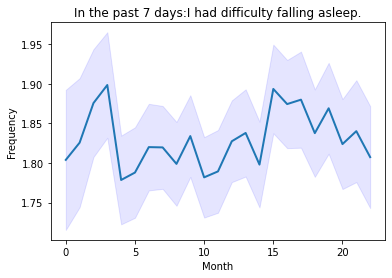

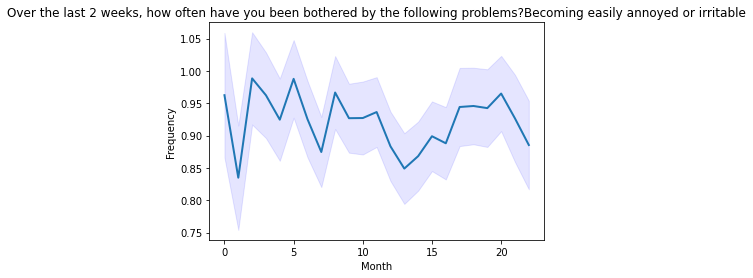

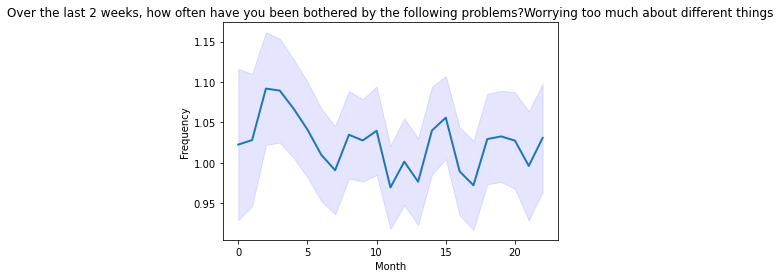

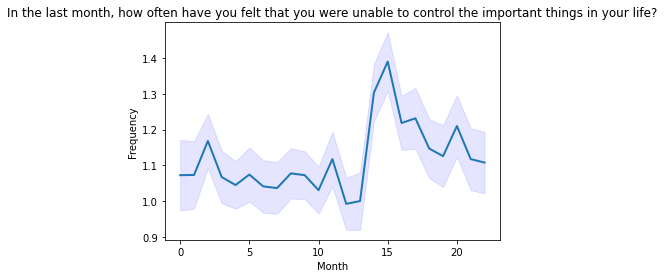

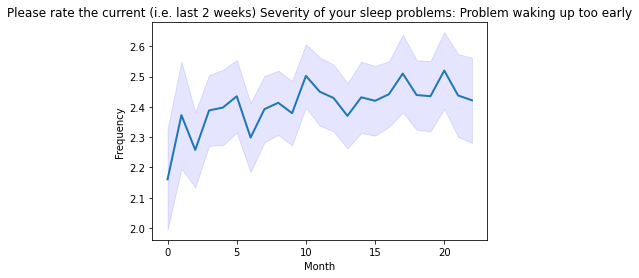

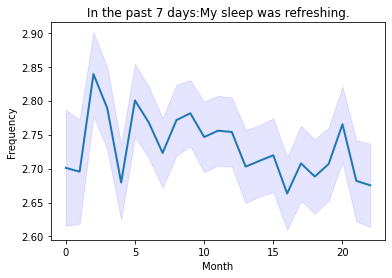

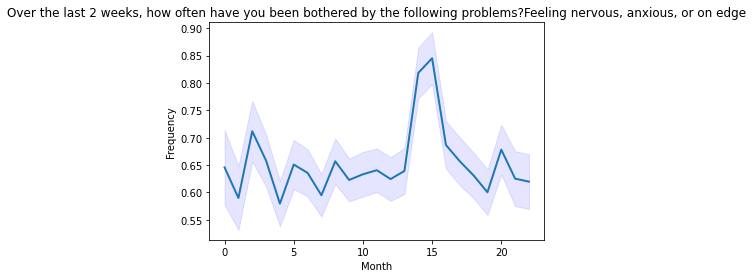

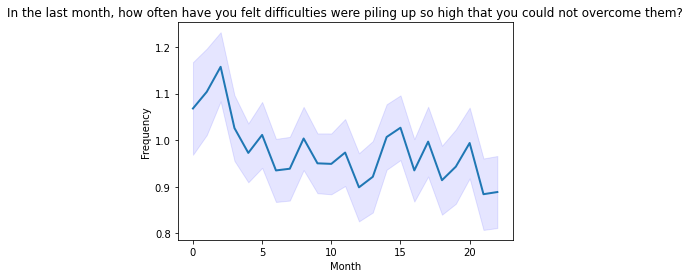

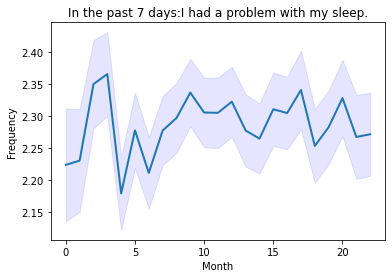

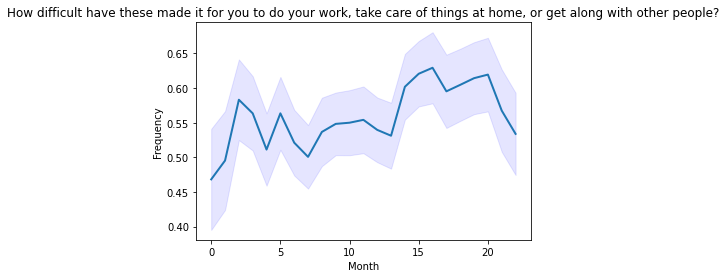

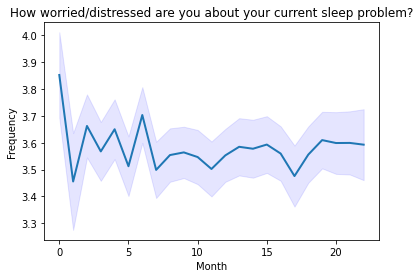

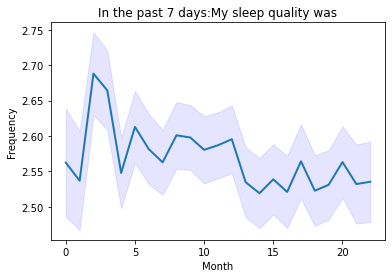

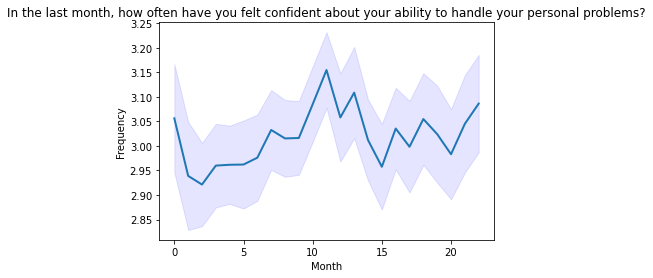

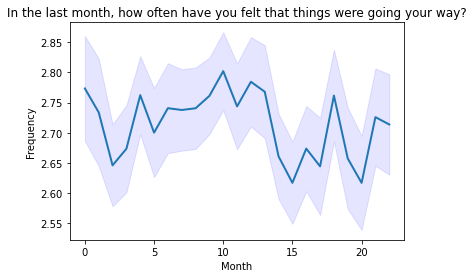

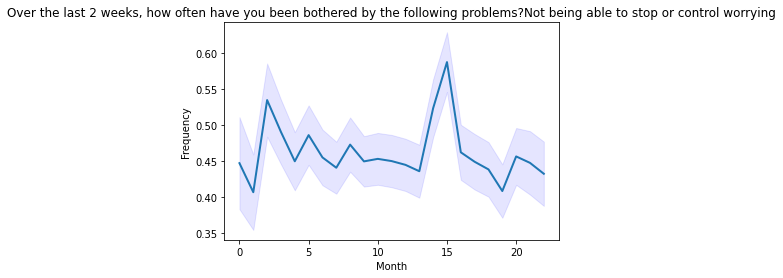

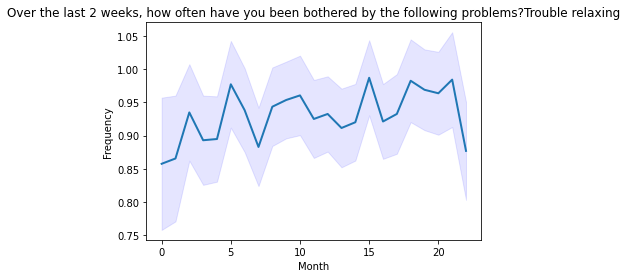

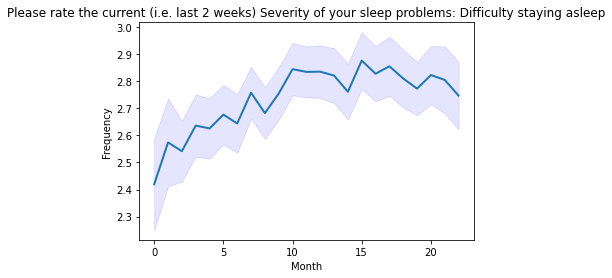

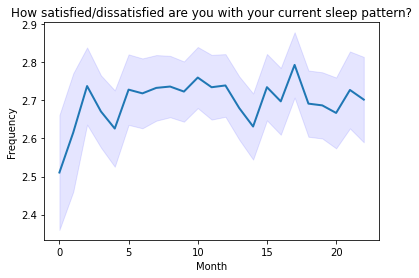

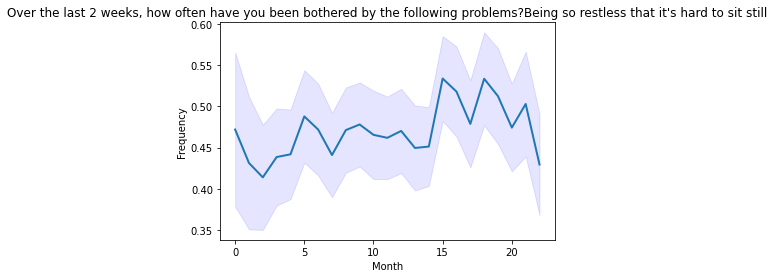

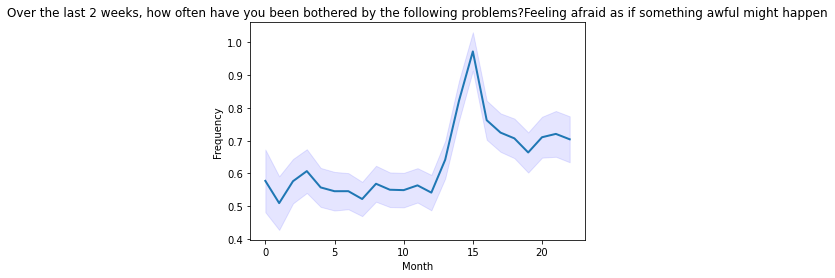

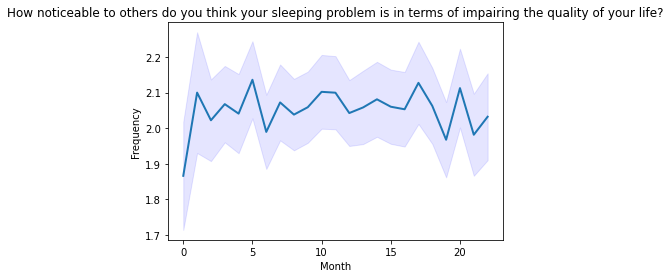

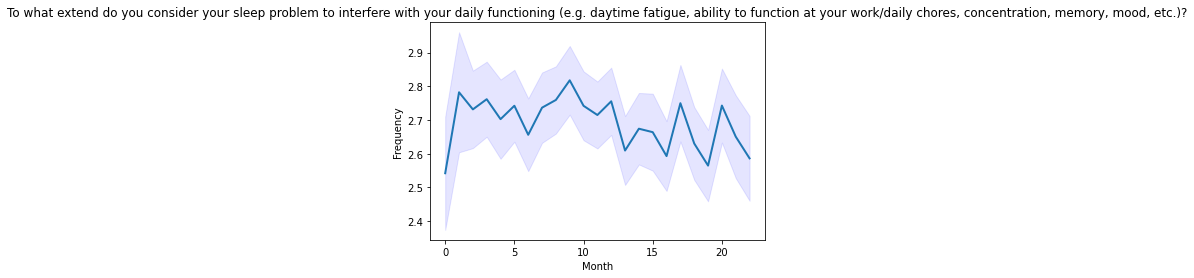

In [14]:
for i in questions_index:
    
    # Get the question
    q = questions[i]
    
    # Store the mean and standard error of answers
    criteria_mean = []
    criteria_se = []
    
    # From Jan 2019 to Nov 2020
    for time in time_array:
        
        # Read the file
        file = '/Users/wenjzh/githubproject/Health-Big-Data/data/Surveys/Surveys_' + time + '.csv'
        survey = pd.read_csv(file, engine = "python")
        survey = survey[['ParticipantResearchID',
                         'SurveyName', 
                         'SurveyStartDate',
                         'SurveyQuestion', 
                         'SurveyAnswer']]
        # Extract the answer
        criteria = survey[survey.SurveyQuestion == q].SurveyAnswer
        criteria = pd.to_numeric(criteria)
        
        # Calculate the mean and standard error
        criteria_mean.append(criteria.mean())
        criteria_se.append(stats.sem(criteria, nan_policy = 'omit'))
    
    # Calculate the confidence interval
    under_line = np.array(criteria_mean) - 1.96 * np.array(criteria_se)
    over_line = np.array(criteria_mean) + 1.96 * np.array(criteria_se)
    
    # Plot the change answers over time
    plt.plot(month, criteria_mean, linewidth=2) #mean curve.
    plt.fill_between(month, under_line, over_line, color='b', alpha=.1) #CI curves.
    plt.title(q)
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    fig_name = 'test' + str(i) + '.png'
    plt.savefig(fig_name) 
    plt.show() 